In [70]:
import pandas as pd
import numpy as np
import wordcloud
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
%matplotlib inline

In [7]:
df = pd.read_csv("data/debate.csv", index_col="Line", encoding='iso-8859-1')
clinton_df = df[df.Speaker=="Clinton"].copy()
trump_df = df[df.Speaker=="Trump"].copy()

In [156]:
tokenizer = RegexpTokenizer(r'\w+')

clinton_text = '. '.join(clinton_df['Text'])
trump_text = '. '.join(trump_df['Text'])

clinton_words = tokenizer.tokenize(clinton_text)
trump_words = tokenizer.tokenize(trump_text)

clinton_sentences = clinton_text.replace(",", ".").replace("?", ".").split(".")
trump_sentences = trump_text.replace(",", ".").replace("?", ".").split(".")

clin_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in clinton_sentences]
tr_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in trump_sentences]

clin_sent_len = filter(lambda a: a >= 0.1, clin_sent_lenghs)
tr_sent_len = filter(lambda a: a >= 0.1, tr_sent_lenghs)

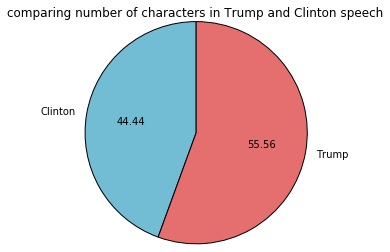

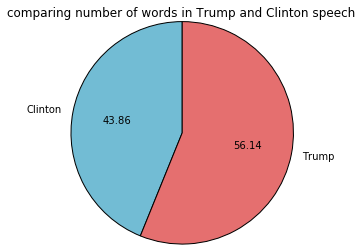

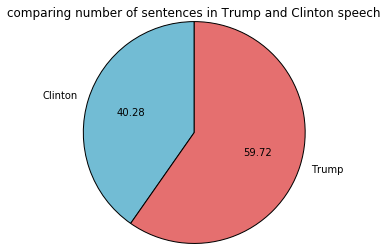

In [157]:
# comparing total length of characters utterred
tot_chars = []
tot_chars.append(len(clinton_text))
tot_chars.append(len(trump_text))
labels = 'Clinton','Trump'
colors = ["#72bcd4", '#e56f6f']
ax1=plt.pie(tot_chars, colors=colors, shadow=False, startangle=90, labels=labels, autopct='%.2f')
plt.axis('equal')
plt.title("comparing number of characters in Trump and Clinton speech")
plt.show()

tot_words = [len(clinton_words), len(trump_words)]
ax2=plt.pie(tot_words, colors=colors, shadow=False, startangle=90, labels=labels, autopct='%.2f')
plt.title("comparing number of words in Trump and Clinton speech")
plt.axis('equal')
plt.show()

tot_sent = [len(clinton_sentences), len(trump_sentences)]
ax2=plt.pie(tot_sent, colors=colors, shadow=False, startangle=90, labels=labels, autopct='%.2f')
plt.title("comparing number of sentences in Trump and Clinton speech")
plt.axis('equal')
plt.show()

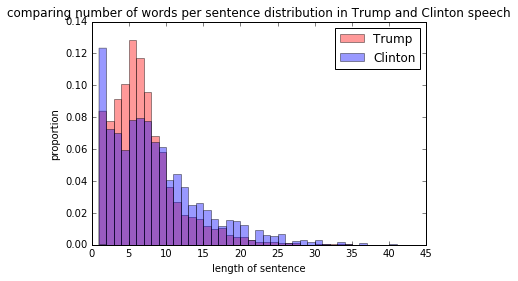

In [187]:
ax = plt.hist(tr_sent_len, bins=range(min(tr_sent_len), max(tr_sent_len) + 1, 1), 
              alpha=0.4, color="red", normed=True)
ax = plt.hist(clin_sent_len, bins=range(min(clin_sent_len), max(clin_sent_len) + 1, 1),
              alpha=0.4, color="blue", normed=True)
labels = ['Trump',"Clinton"]
plt.legend(labels)
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("comparing number of words per sentence distribution in Trump and Clinton speech")

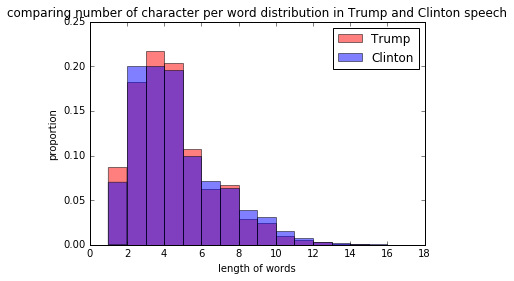

In [188]:
clin_word_len = [len(i) for i in clinton_words]
tr_word_len = [len(i) for i in trump_words]
ax = plt.hist(tr_word_len, bins=range(min(tr_word_len), max(tr_word_len) +1, 1),
              alpha=0.5, color="red", normed=True)
ax = plt.hist(clin_word_len, bins=range(min(clin_word_len), max(clin_word_len) +1, 1),
              alpha=0.5, color="blue", normed=True)
labels = ['Trump',"Clinton"]
plt.xlabel("length of words")
plt.ylabel("proportion")
plt.legend(labels)
plt.title("comparing number of character per word distribution in Trump and Clinton speech")